In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
passmark = 40

In [3]:
df = pd.read_csv("StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Size of data frame 

In [5]:
print (df.shape)

(1000, 8)


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Let us check for any missing values

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Let us explore the Math Score first 

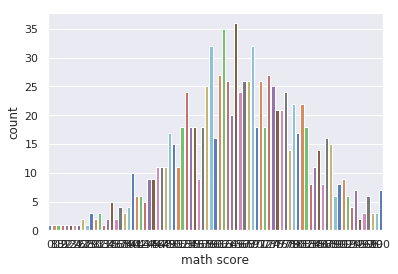

In [8]:
sns.set(style='darkgrid')
sns.countplot(x="math score", data = df, palette="muted")
plt.show()


[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
65    36
62    35
59    32
69    32
73    27
61    27
67    26
63    26
68    26
71    26
58    25
74    25
77    24
53    24
66    24
81    22
79    22
75    21
76    21
64    20
82    18
70    18
54    18
55    18
57    18
52    18
72    18
49    17
80    17
60    16
      ..
97     6
42     6
41     6
89     6
35     5
43     5
37     4
93     4
39     4
29     3
32     3
99     3
38     3
98     3
96     3
30     2
36     2
95     2
27     2
34     2
33     1
28     1
26     1
24     1
23     1
22     1
19     1
18     1
8      1
0      1
Name: math score, Length: 81, dtype: int64


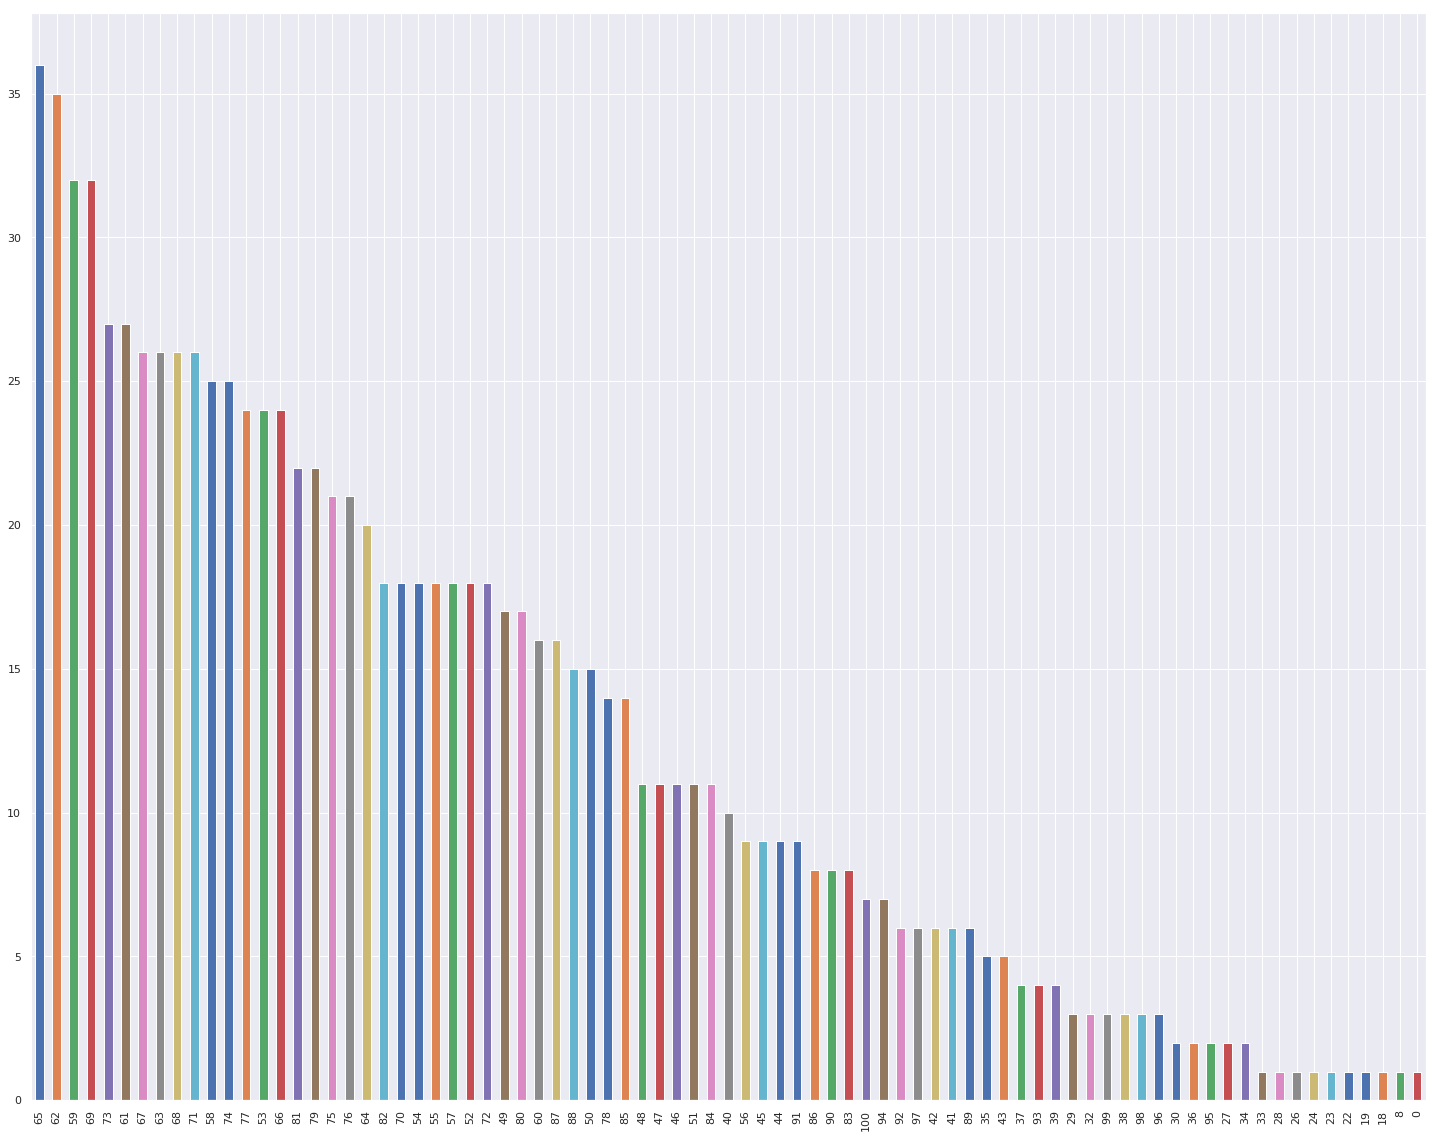

In [9]:
#df.sort_values(by=["math score"],ascending=False,inplace=True)
print(df["math score"].unique())
print(df['math score'].value_counts())
df['math score'].value_counts().plot(kind="bar",figsize=(25,20))

### How many students passed in Math exam ? 

In [22]:
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()
#print(df.Math_PassStatus)

P    960
F     40
Name: Math_PassStatus, dtype: int64

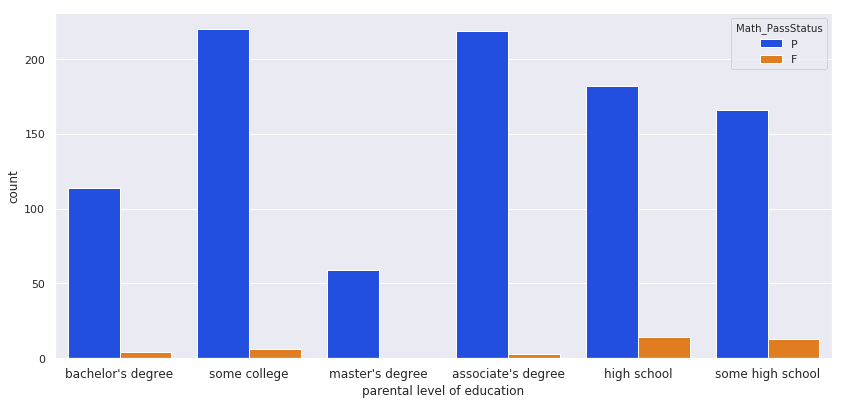

In [30]:
fig=plt.figure()
ax=fig.add_axes([.1,.1,1.8,1.2])
ax.set_xticklabels(df['parental level of education'], rotation =0, fontsize='medium')

sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright',)
plt.show()

### Reading score's

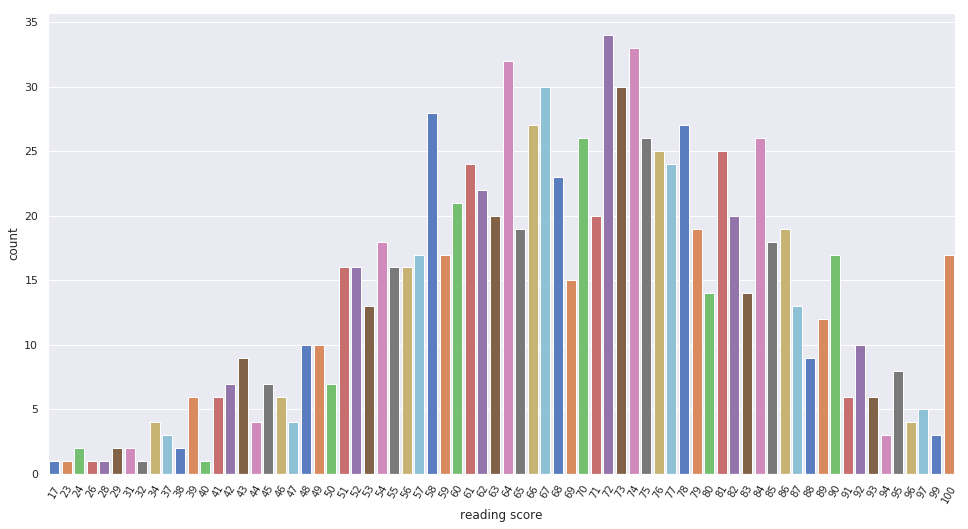

In [46]:
fig=plt.figure()
ax=fig.add_axes([.1,.1,2.1,1.6])
ax.set_xticklabels(df['reading score'], rotation =60, fontsize='small')
sns.countplot(x="reading score", data = df, palette="muted")
plt.show()

### How many studends passed in reading?

In [47]:
df['Reading_PassStatus'] = np.where(df['reading score']<passmark, 'F', 'P')
df.Reading_PassStatus.value_counts()

P    974
F     26
Name: Reading_PassStatus, dtype: int64

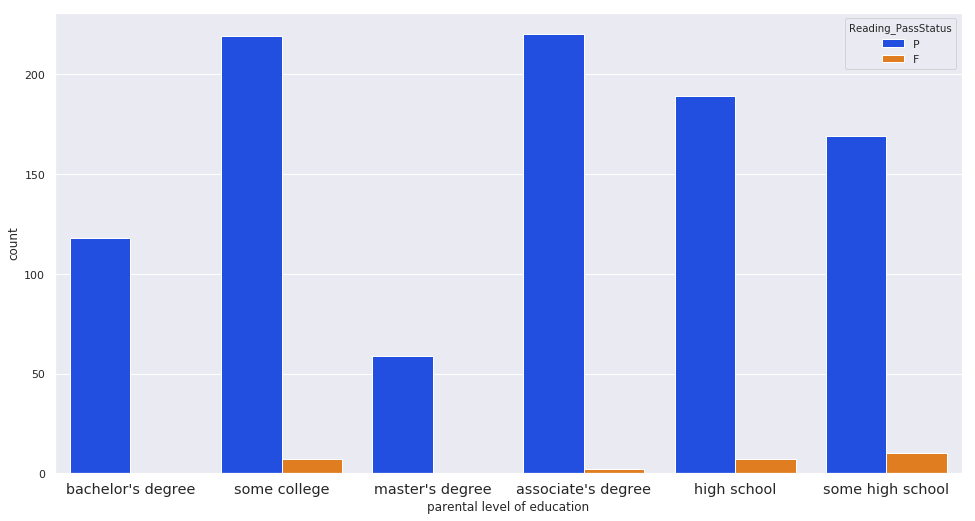

In [50]:
fig=plt.figure()
ax=fig.add_axes([.1,.1,2.1,1.6])
ax.set_xticklabels(df['parental level of education'], rotation =0, fontsize='large')
sns.countplot(x='parental level of education', data = df, hue='Reading_PassStatus', palette='bright')
plt.show()


### writing score

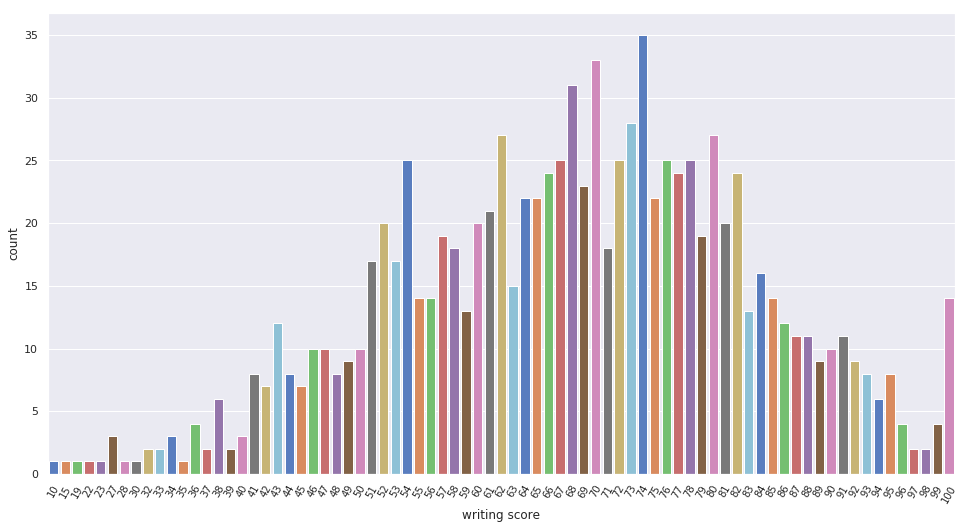

In [53]:
fig=plt.figure()
ax=fig.add_axes([.1,.1,2.1,1.6])
ax.set_xticklabels(df['writing score'], rotation =60, fontsize='small')
sns.countplot(x="writing score", data = df, palette="muted")
plt.show()

###  

### number of students passed writing  

In [54]:
df['Writing_PassStatus'] = np.where(df['writing score']<passmark, 'F', 'P')
df.Writing_PassStatus.value_counts()

P    968
F     32
Name: Writing_PassStatus, dtype: int64

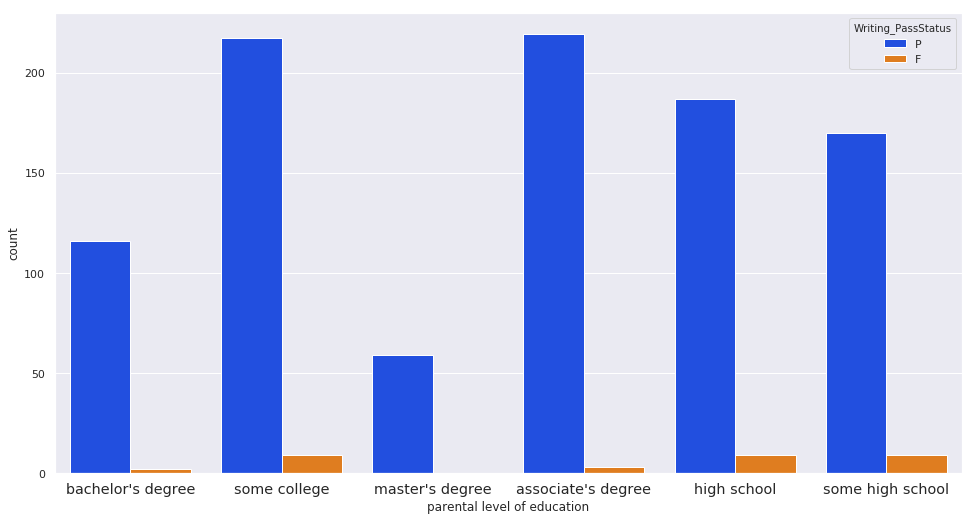

In [57]:
fig=plt.figure()
ax=fig.add_axes([.1,.1,2.1,1.6])
ax.set_xticklabels(df['parental level of education'], rotation =0, fontsize='large')
sns.countplot(x='parental level of education', data = df, hue='Writing_PassStatus', palette='bright')
plt.show()

###  "How many students passed in all the subjects ?"

In [58]:
df['OverAll_PassStatus'] = df.apply(lambda x : 'F' if x['Math_PassStatus'] == 'F' or 
                                    x['Reading_PassStatus'] == 'F' or x['Writing_PassStatus'] == 'F' else 'P'
                                    , axis =1)

df.OverAll_PassStatus.value_counts()

P    949
F     51
Name: OverAll_PassStatus, dtype: int64

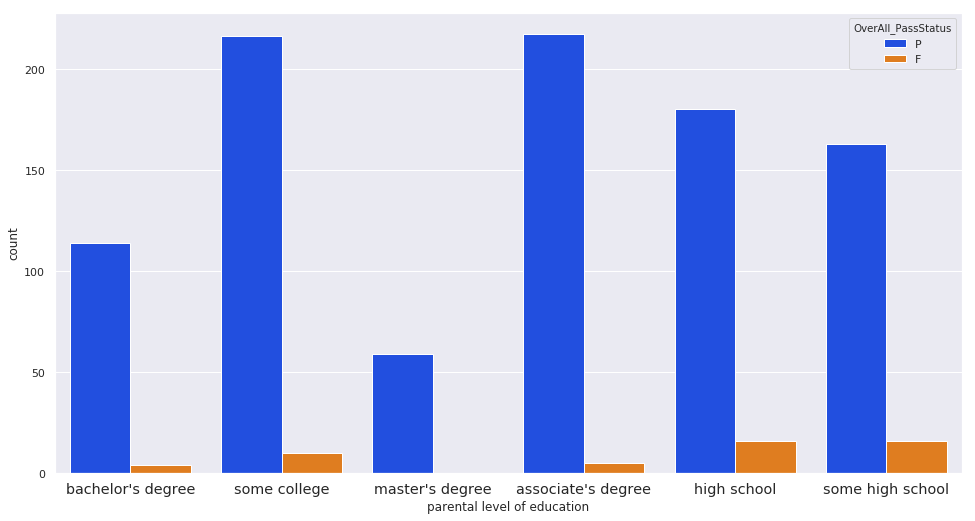

In [60]:
fig=plt.figure()
ax=fig.add_axes([.1,.1,2.1,1.6])
ax.set_xticklabels(df['parental level of education'], rotation =0, fontsize='large')
sns.countplot(x='parental level of education', data = df, hue='OverAll_PassStatus', palette='bright')
plt.show()

### Finding the percentage of marks 

In [61]:
df['Total_Marks'] = df['math score']+df['reading score']+df['writing score']
df['Percentage'] = df['Total_Marks']/3

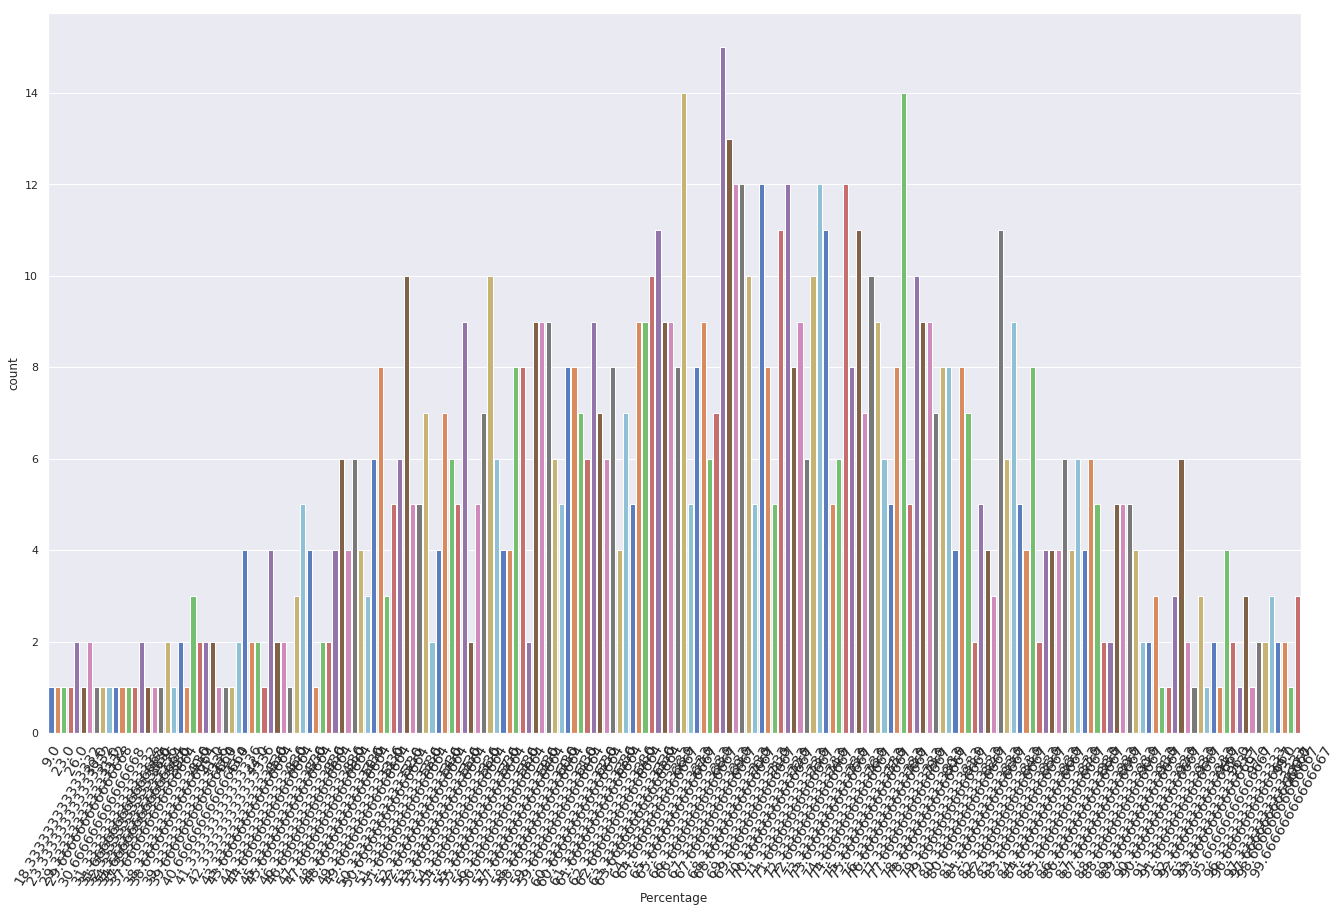

In [66]:
fig=plt.figure()
ax=fig.add_axes([.1,.1,2.9,2.5])
ax.set_xticklabels(df['Percentage'], rotation =60, fontsize='large')
sns.countplot(x="Percentage", data = df, palette="muted")
plt.show()

### Let us assign the grades
## Grading
## above 80 = A Grade
### 70 to 80 = B Grade
### 60 to 70 = C Grade
### 50 to 60 = D Grade
### 40 to 50 = E Grade¶
### below 40 = F Grade ( means Fail )

In [67]:
def GetGrade(Percentage, OverAll_PassStatus):
    if ( OverAll_PassStatus == 'F'):
        return 'F'    
    if ( Percentage >= 80 ):
        return 'A'
    if ( Percentage >= 70):
        return 'B'
    if ( Percentage >= 60):
        return 'C'
    if ( Percentage >= 50):
        return 'D'
    if ( Percentage >= 40):
        return 'E'
    else: 
        return 'F'

df['Grade'] = df.apply(lambda x : GetGrade(x['Percentage'], x['OverAll_PassStatus']), axis=1)

df.Grade.value_counts()

B    261
C    256
A    198
D    178
E     56
F     51
Name: Grade, dtype: int64

### we will plot the grades obtained in a order 

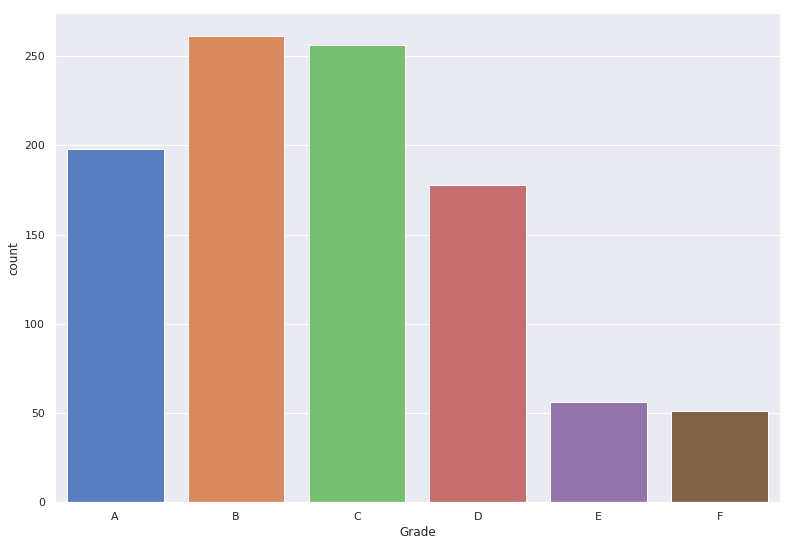

In [72]:
from matplotlib import rcParams
rcParams["figure.figsize"]=13,9
sns.countplot(x="Grade", data = df, order=['A','B','C','D','E','F'],  palette="muted")
plt.show()

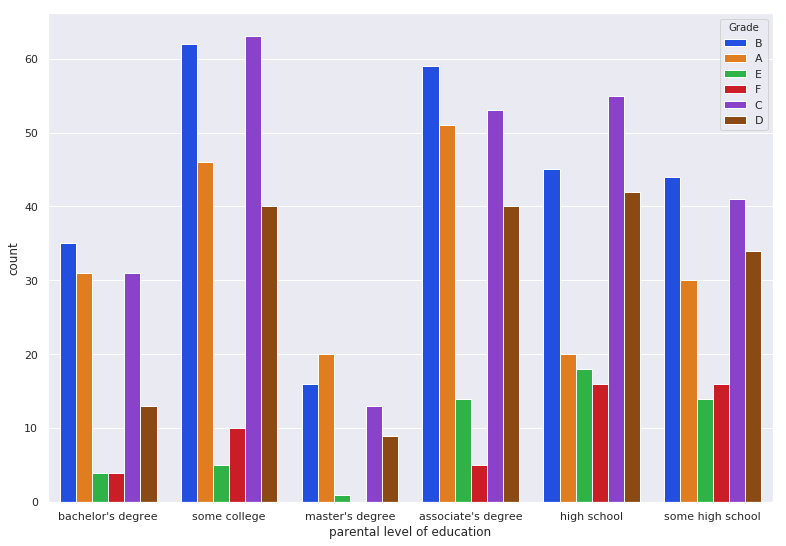

In [73]:
sns.countplot(x='parental level of education', data = df, hue='Grade', palette='bright')
plt.show()